<a href="https://colab.research.google.com/github/ua-datalab/Geospatial_Workshops/blob/main/COGs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
pip install rasterio --quiet

In [14]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import requests

In [15]:
cog_path = 'https://data.cyverse.org/dav-anon/iplant/home/jgillan/cog_test/planet_6sept2020_COG.tif'

In [17]:
with rasterio.open(cog_path) as dataset:
    # Now you can work with the dataset, e.g., read out specific bands, metadata, etc.
    print(dataset.profile)  # Print the dataset profile, like CRS, bounds, etc.

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 18828, 'height': 15837, 'count': 4, 'crs': CRS.from_epsg(32612), 'transform': Affine(3.0, 0.0, 488817.0,
       0.0, -3.0, 3613986.0), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'compress': 'lzw', 'interleave': 'pixel'}


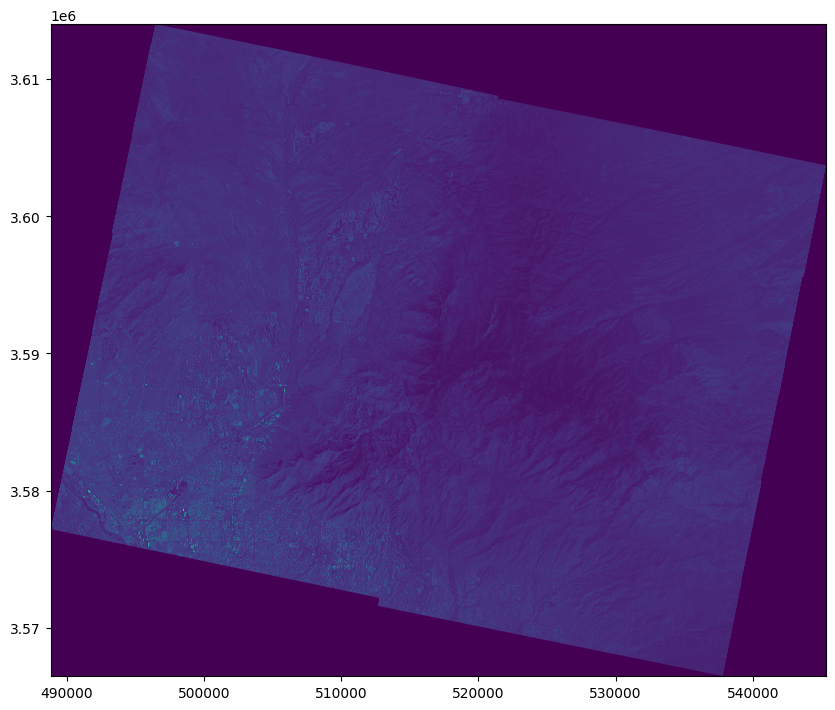

In [6]:
with rasterio.open(cog_path) as dataset:
    # Read the entire dataset
    # This reads all bands; if the dataset is multi-band, they will be read into a 3D array
    data = dataset.read()

    # Display the image
    # For simplicity, this example displays the first band.
    # Adjust the index if you want to display a different band or a combination of bands.
    plt.figure(figsize=(10, 10))
    show(data[0], transform=dataset.transform)

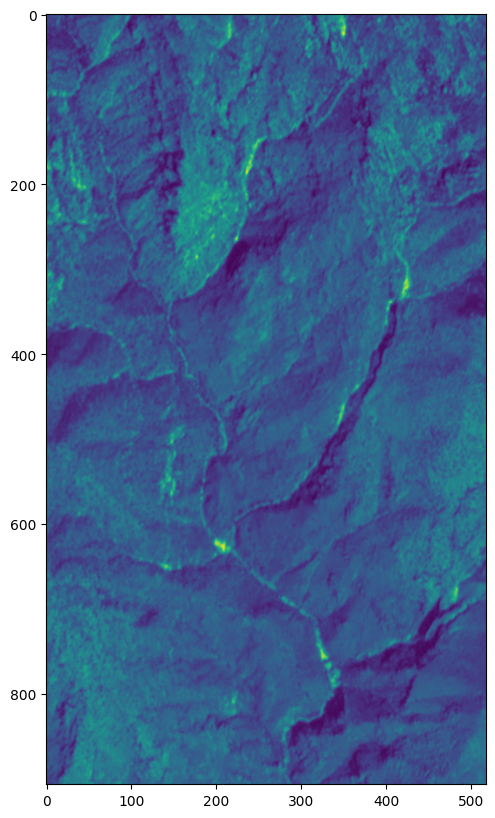

CRS: EPSG:32612
Width: 518, Height: 907
Data Type: uint16


In [36]:
# UTM coordinates of interest (for example, corners of a rectangle)
# Replace these values with your actual coordinates
utm_x1, utm_y1 = 521354, 3588540   # Lower left corner 2700 m wide
utm_x2, utm_y2 = 524074, 3590092   # Upper right corner 1552 m tall


with rasterio.open(cog_path) as dataset:
    # Convert UTM coordinates to pixel coordinates
    # Note: This assumes the dataset is in a UTM projection
    px1, py1 = dataset.index(utm_x1, utm_y1)
    px2, py2 = dataset.index(utm_x2, utm_y2)

    # Create a window from the pixel coordinates
    # Note: min/max functions ensure the coordinates are ordered correctly
    window = rasterio.windows.Window.from_slices((min(py1, py2), max(py1, py2)), (min(px1, px2), max(px1, px2)))

    # Read the data within the window
    subset = dataset.read(window=window)

    # Display the image
    plt.figure(figsize=(10, 10))
    #show(subset[0], transform=dataset.window_transform(window))

    show(subset[0])

    print(f"CRS: {dataset.crs}")
    print(f"Width: {window.width}, Height: {window.height}")
    print(f"Data Type: {dataset.dtypes[0]}")

In [32]:
px1, py1

(8482, 10845)

In [33]:
px2, py2

(7964, 11752)

In [34]:
window

Window(col_off=7964, row_off=10845, width=518, height=907)

In [5]:
# Perform a GET request to download the COG
response = requests.get(cog_path)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Open the local file in binary write mode and save the content of the COG
    with open(local_cog_path, 'wb') as f:
        f.write(response.content)
    print("COG downloaded successfully.")
else:
    print(f"Failed to download COG. Status code: {response.status_code}")

COG downloaded successfully.


In [ ]:
### Visualize the Satellite Imagery
## Planetscope band order: band 1 = blue; band 2 = green; band 3 = red; band 4 = near-infrared

with rasterio.open(local_cog_path) as src:
    image = src.read([3, 2, 1])  # Display as false-color composite (show nir as red; show red as green; show green as blue)

# Normalize the bands
image = image.astype('float32')
for i in range(image.shape[0]):
    image[i] /= image[i].max()

plt.figure(figsize=(10, 10))

image = image.transpose(1, 2, 0)  # Transpose dimensions
plt.imshow(image)
plt.axis('off')
plt.show()